### Importing 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CoilData = pd.read_csv("data/Constriction.plotDfsv")

In [4]:
CoilData[CoilData['plotDfoil'] == 151818]

,Unnamed: 0,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,...,s,al,ma,b,n,ti,cr,va,mo,constriction


### Cleaning Data

In [13]:
def clean_data(CoilData):
    #Replace *** with nan & drop them
    CoilData = CoilData.replace('^\*+$', np.NaN, regex=True)
    CoilData = CoilData.dropna()

    #Also drop where we couldnt calculate a constriction due to incorrect/missing csv files
    CoilData = CoilData.drop(CoilData[CoilData['constriction'] == -1].index)
    CoilData = CoilData.reset_index(drop=True)
    CoilData = CoilData.drop('Unnamed: 0',1)
    return CoilData

CoilData = clean_data(CoilData)
CoilData

C:\Users\FREDER~1\AppData\Local\Temp/ipykernel_2188/304520901.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  CoilData = CoilData.drop('Unnamed: 0',1)


,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,Thickness profile,...,s,al,ma,b,n,ti,cr,va,mo,constriction
0,396378,1,K371,10003,101,1302.1,1147,921,4.36,31,...,143,304,291,1,34,6,302,0,25,0
1,396376,3,K371,10123,101,1282.3,1150,920,4.37,35,...,90,395,384,1,33,12,189,25,7,0
2,396377,4,K321,10040,102,1297.4,1183,933,4.43,25,...,115,476,463,1,20,11,288,0,40,0
3,396379,3,K371,10243,102,1295.2,1165,910,4.44,28,...,98,306,296,1,21,9,253,0,9,0
4,396380,4,K321,10012,100,1293.3,1192,909,3.95,26,...,121,340,329,1,28,8,297,0,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55322,15618,1,K371,9948,99,1257.3,1183,913,3.27,11,...,160,389,339,1,26,7,199,0,30,0
55323,15620,1,K371,9951,100,1256.6,1180,922,2.68,12,...,160,405,379,1,24,7,194,0,30,1
55324,15621,3,K371,9885,99,1257.2,1182,919,2.68,13,...,159,334,324,1,26,8,248,0,36,0
55325,15622,1,K371,9885,99,1257.1,1194,923,2.68,11,...,159,334,324,1,26,8,248,0,36,0


In [14]:
CoilData.to_csv("data/CleanCoilData.csv")

 ### Exploring Data 

In [108]:
print(CoilData[CoilData['constriction'] == 1].shape)
print(CoilData[CoilData['constriction'] == 0].shape)
CoilData.shape

(3725, 25)
(51602, 25)


(55327, 25)

In [86]:
columns = CoilData.columns.to_list()
columns

['coil',
 'furnace Number',
 'analyse',
 'Hardness_1',
 'Hardness_2',
 'Width',
 'Temperature before finishing mill',
 'Temperature after finishing mill',
 'Thickness',
 'Thickness profile',
 'c',
 'mn',
 'si',
 'nb',
 'p',
 's',
 'al',
 'ma',
 'b',
 'n',
 'ti',
 'cr',
 'va',
 'mo',
 'constriction']

##### Draw graphs for each feature

CoilData

In [ ]:
plotDf = CoilData[['c','constriction']]
plotDf = plotDf.sort_values(by=['c'])

plotDf['c'] = pd.cut(plotDf['c'],bins=10)
plotDf = plotDf.groupby('c').constriction.sum()
plotDf = pd.DataFrame(c)
plotDf = plotDf.reset_index()

plotDf['c'] = plotDf['c'].astype(str)
plt.figure(figsize=(10,9),dpi=100)
plt.xticks(rotation=45)

sns.barplot(data=plotDf,x="c",y="constriction")
plt.ylabel("# of constrictions")

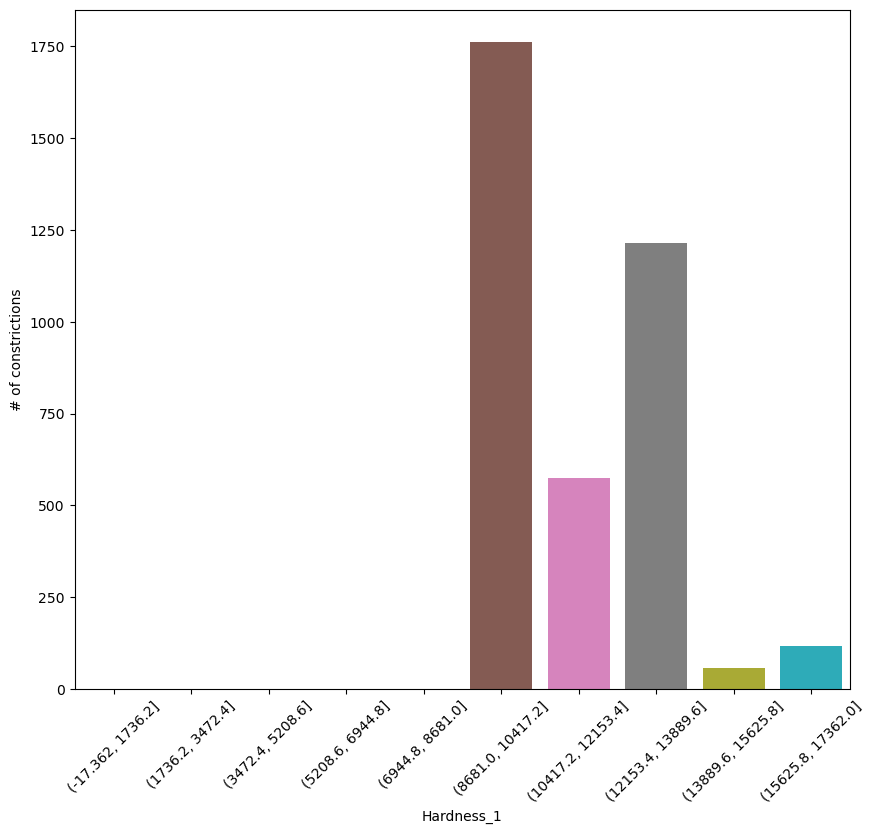

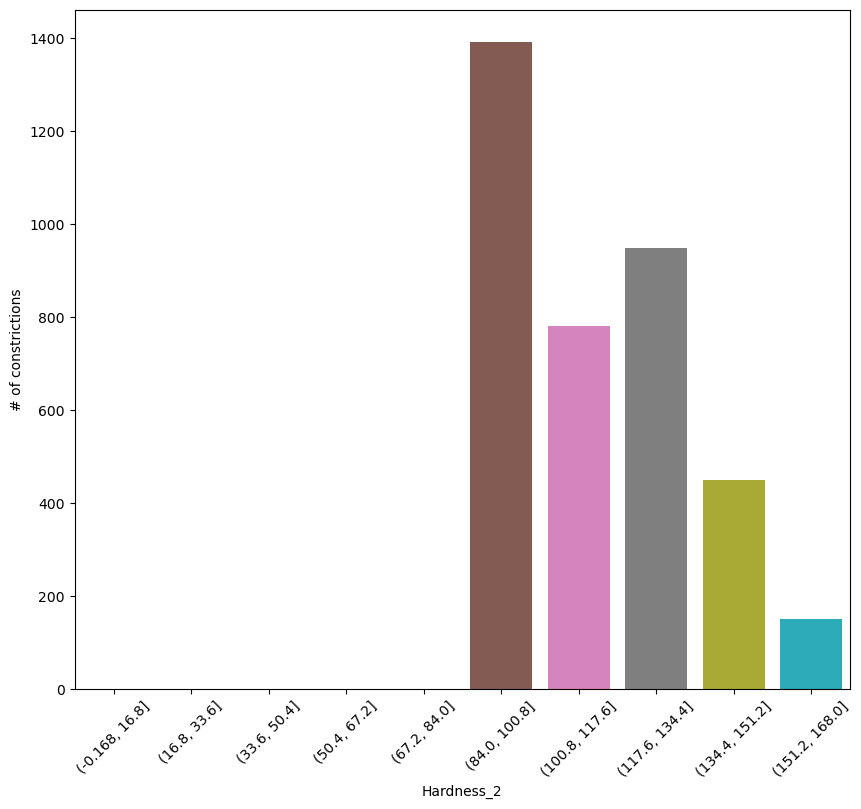

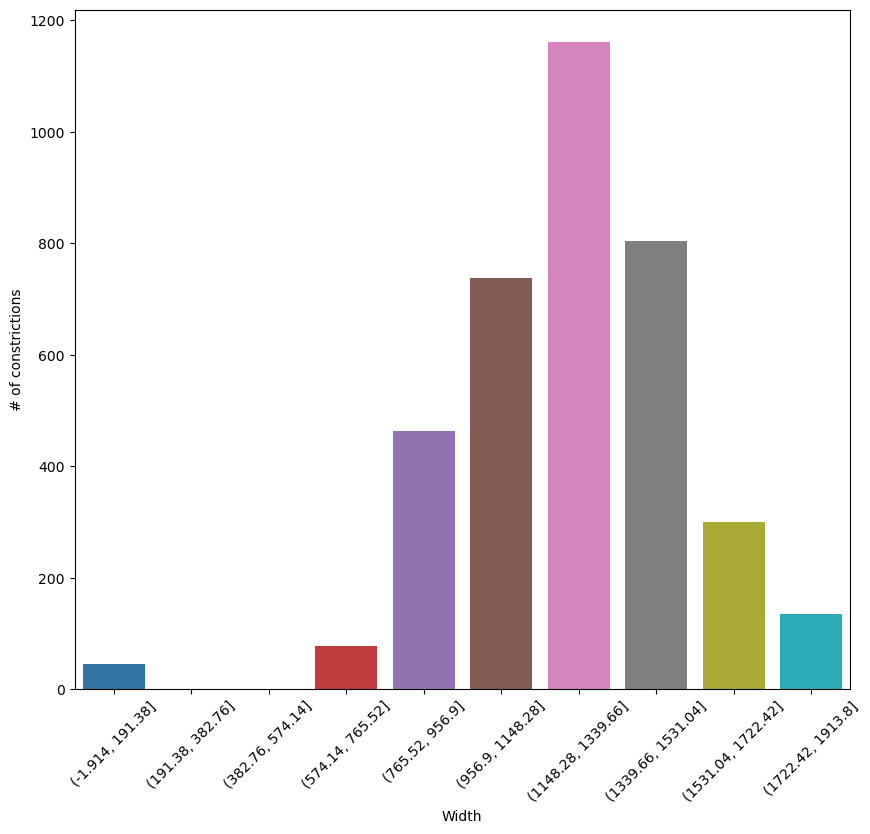

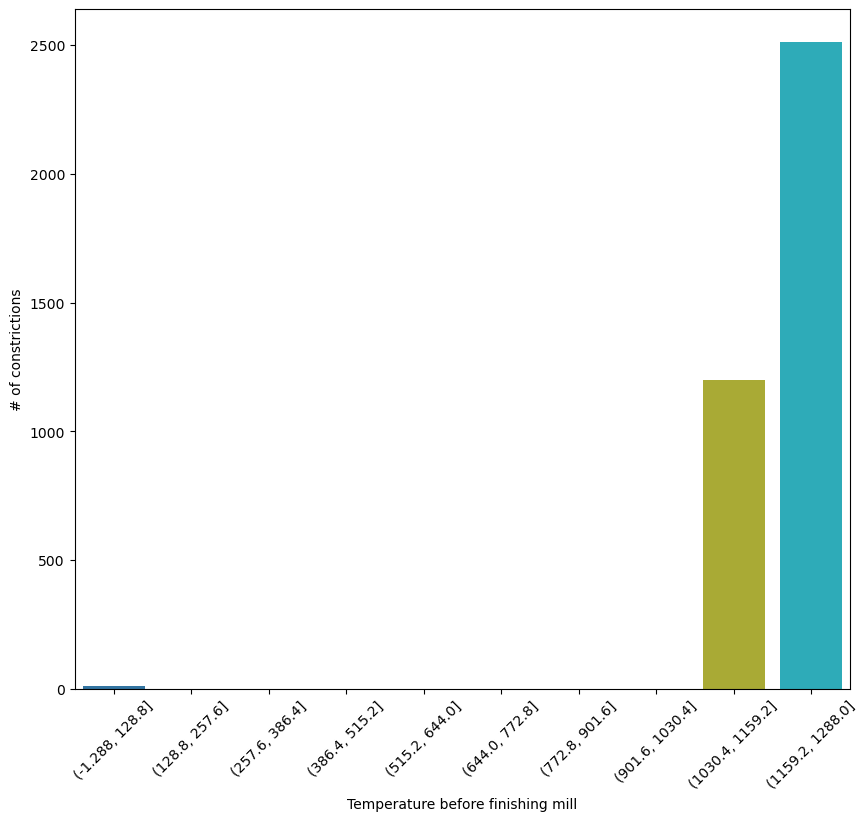

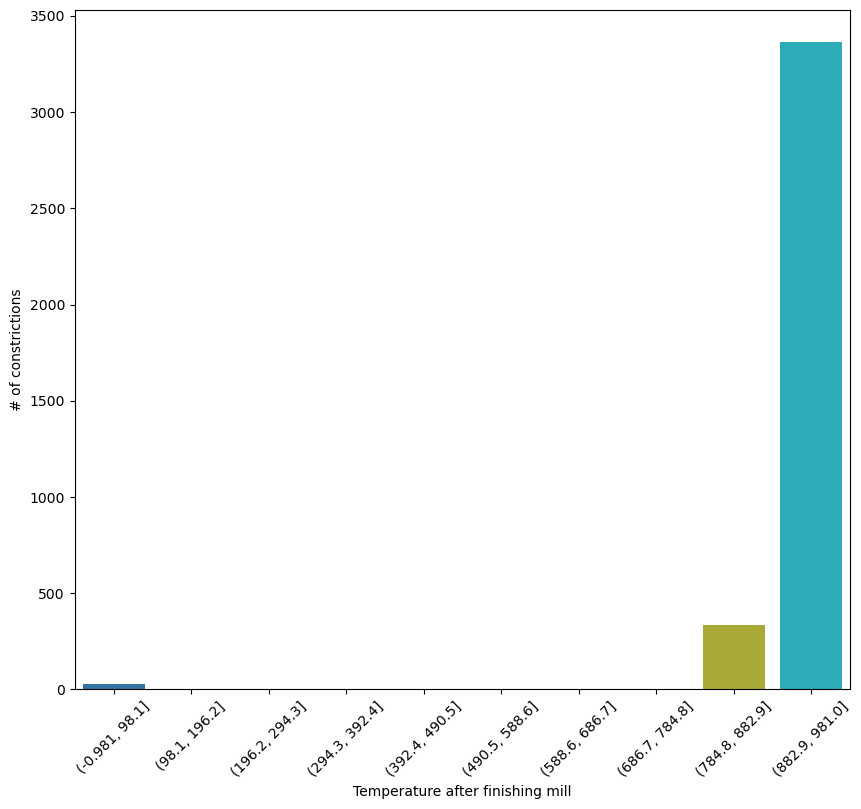

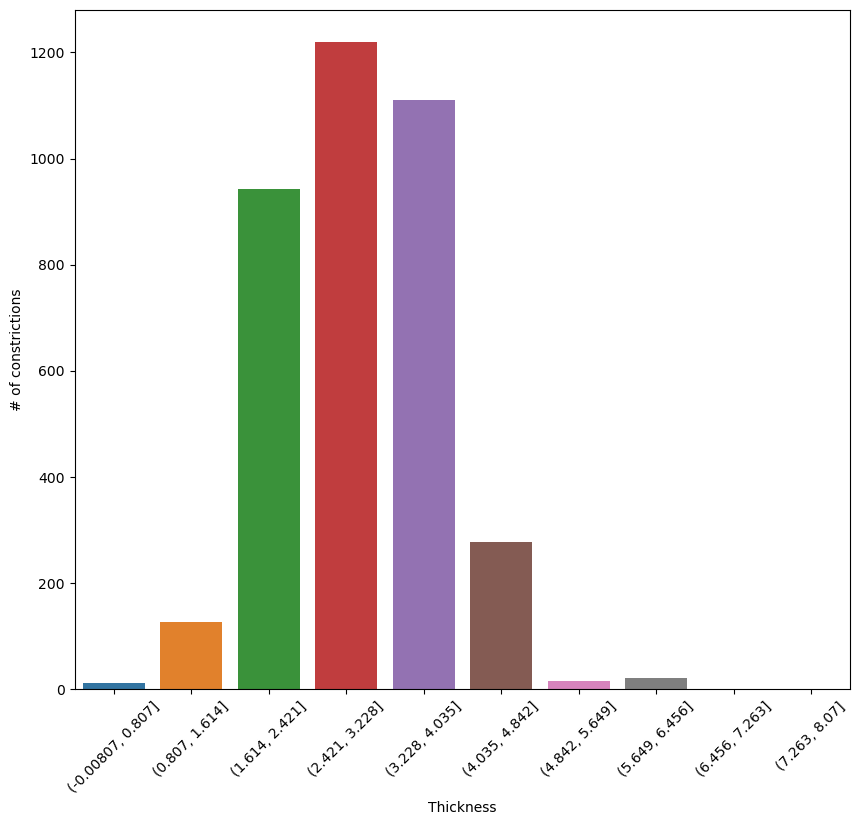

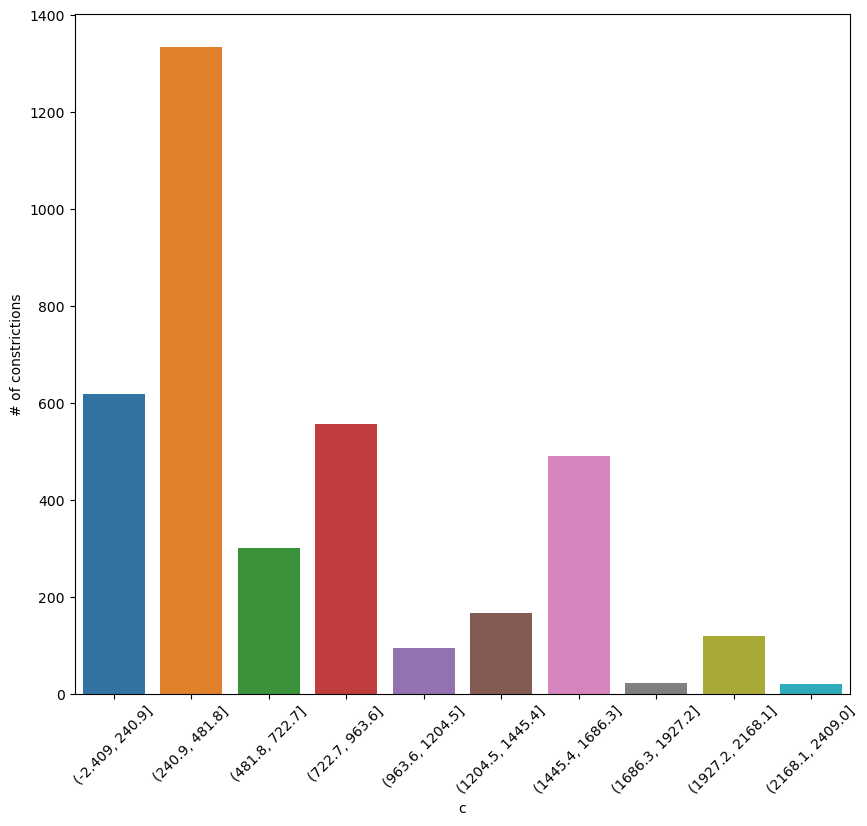

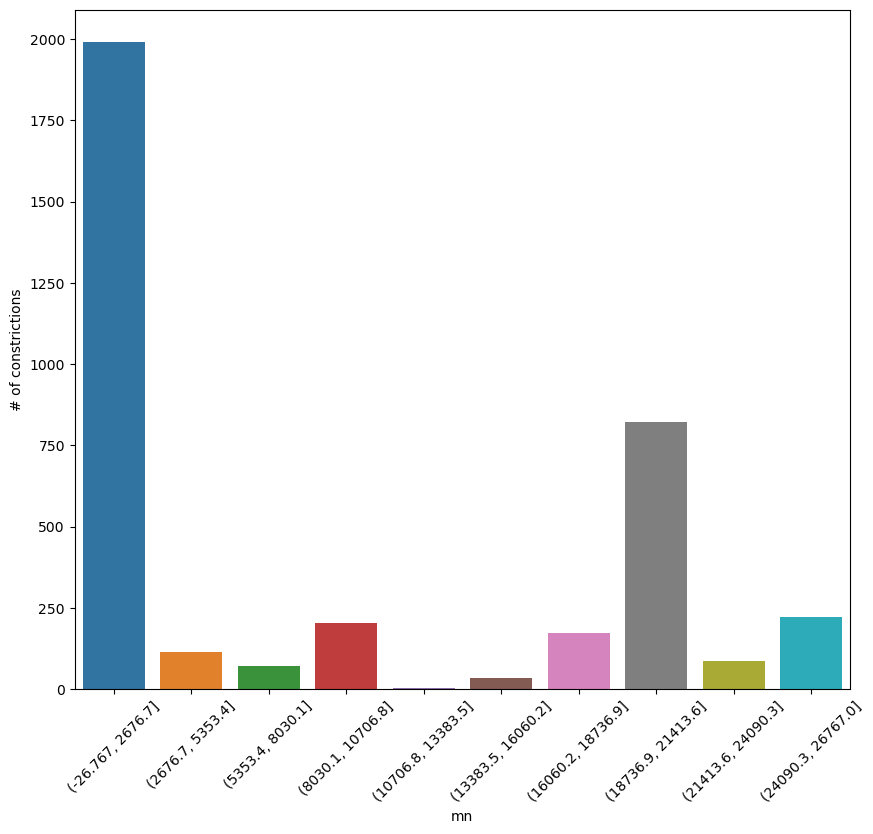

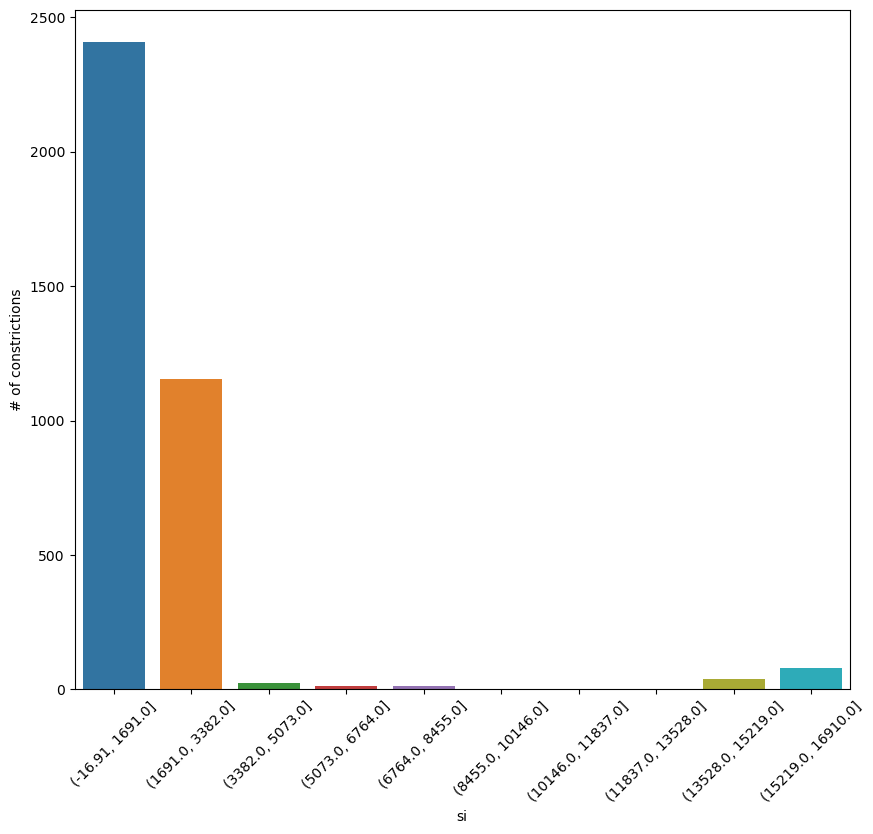

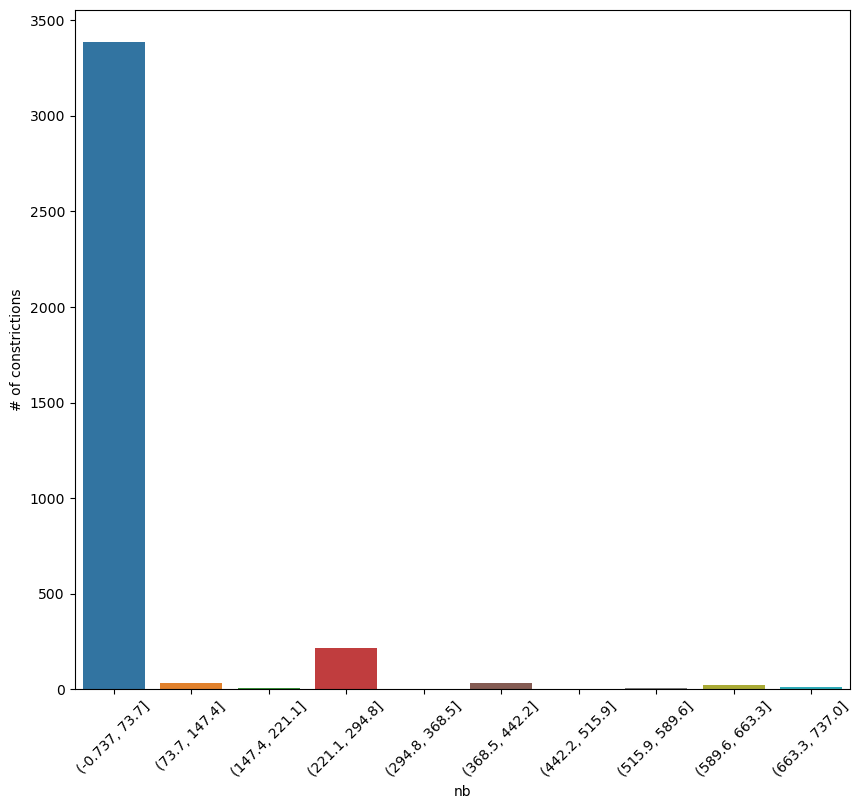

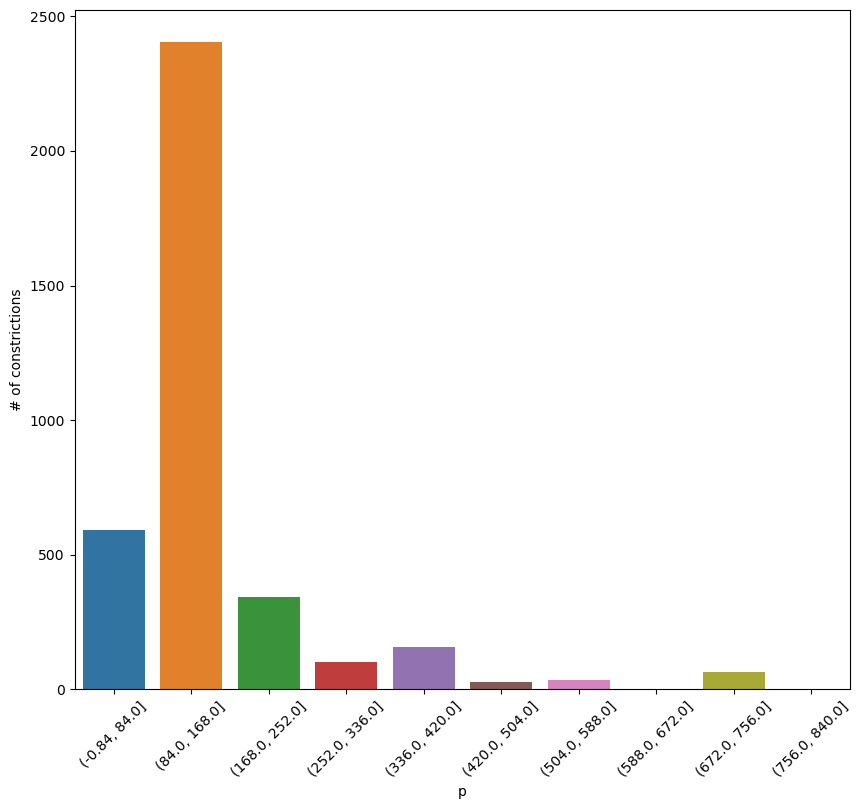

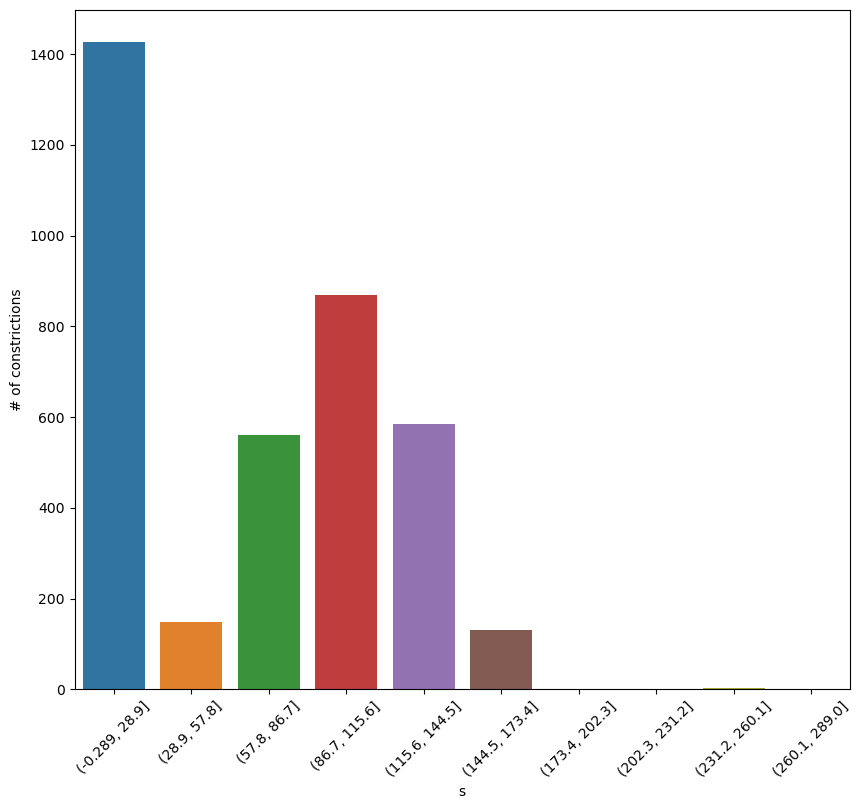

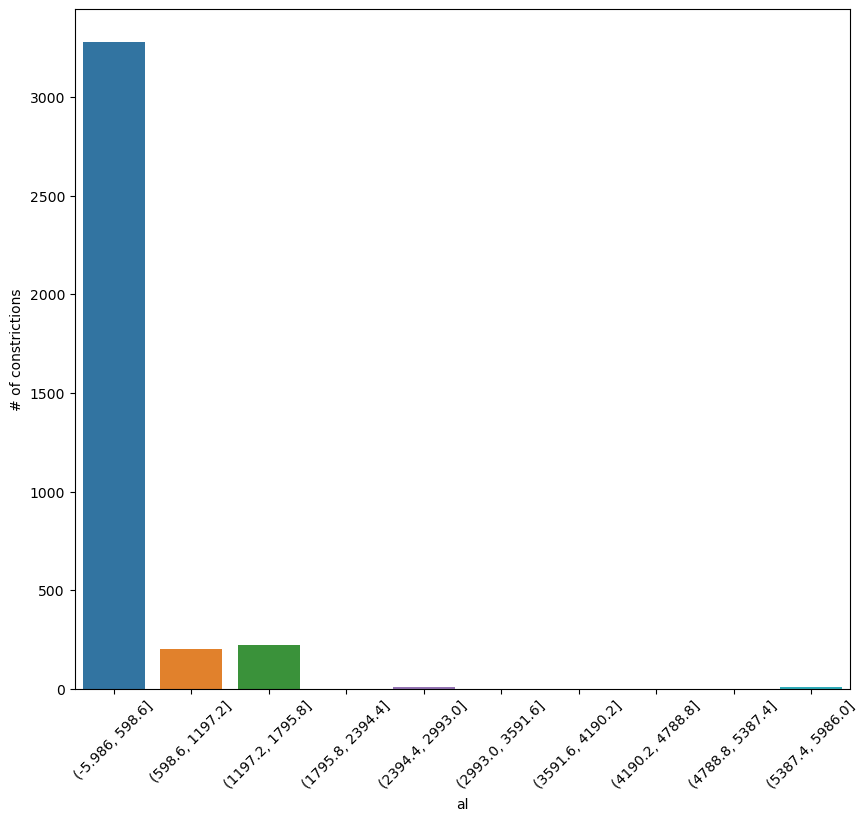

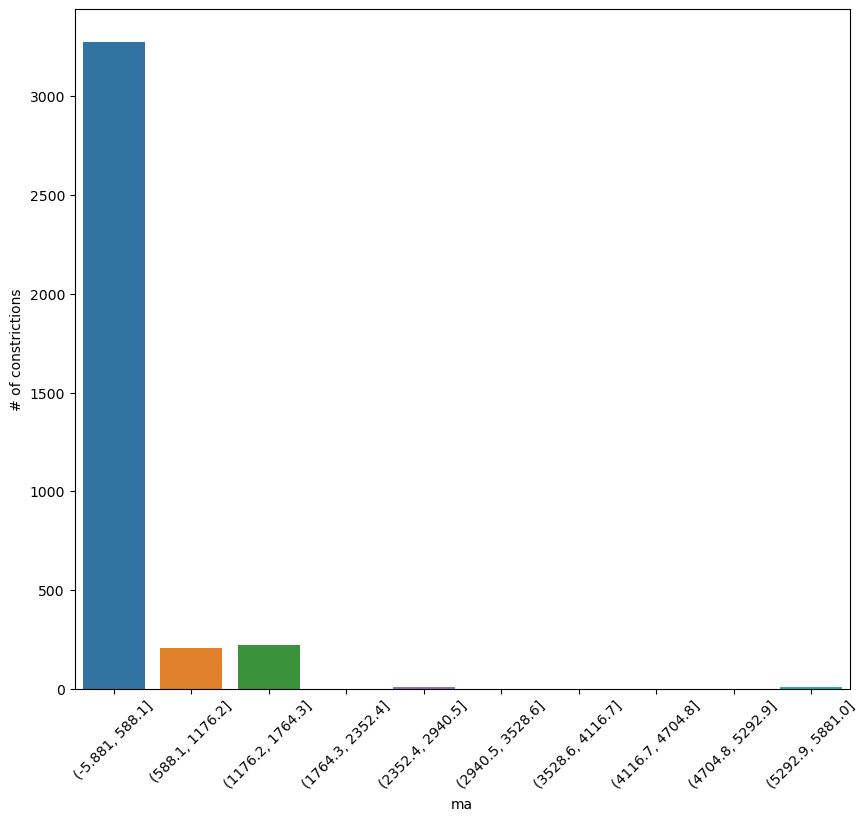

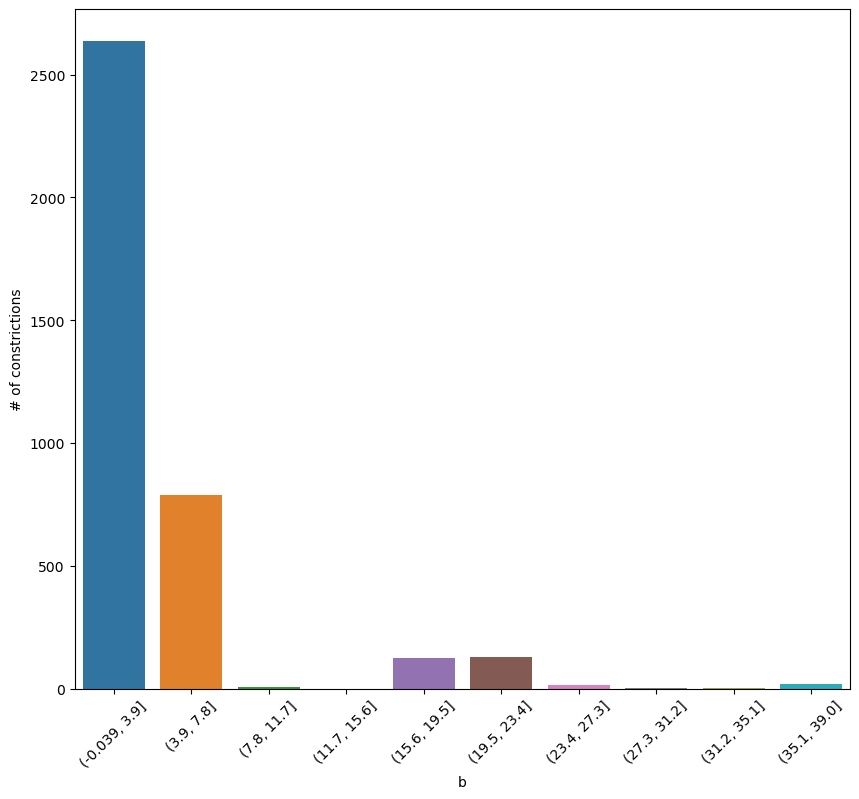

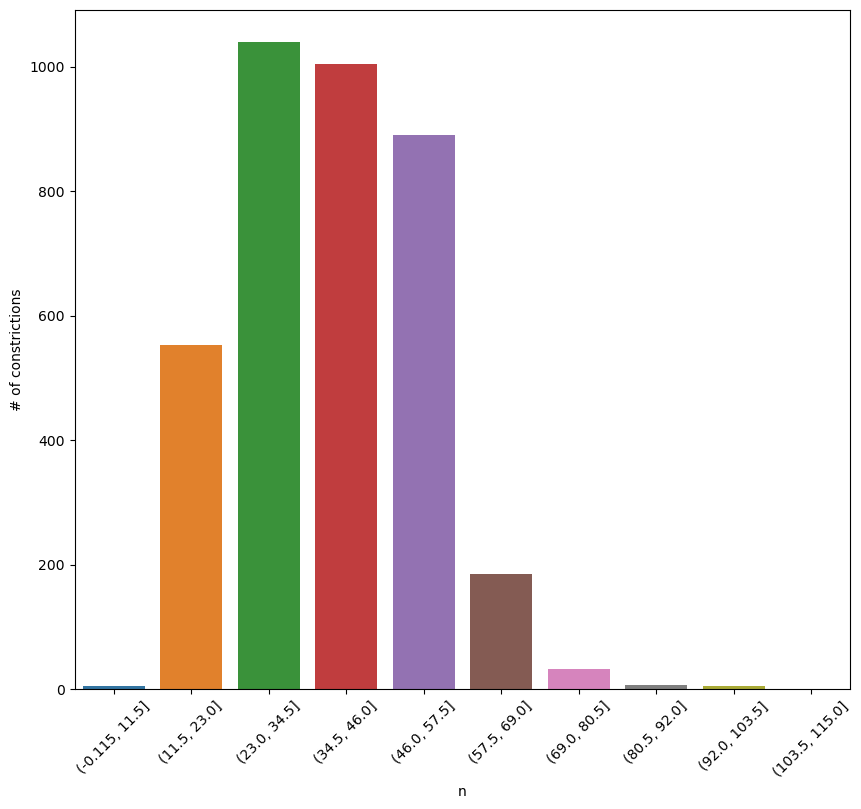

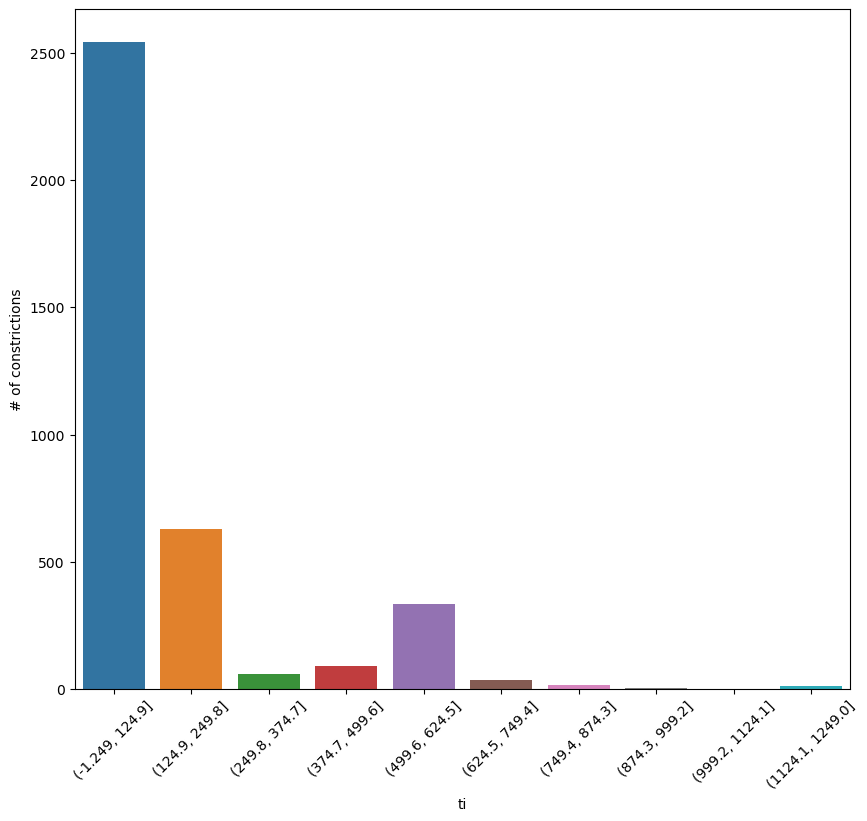

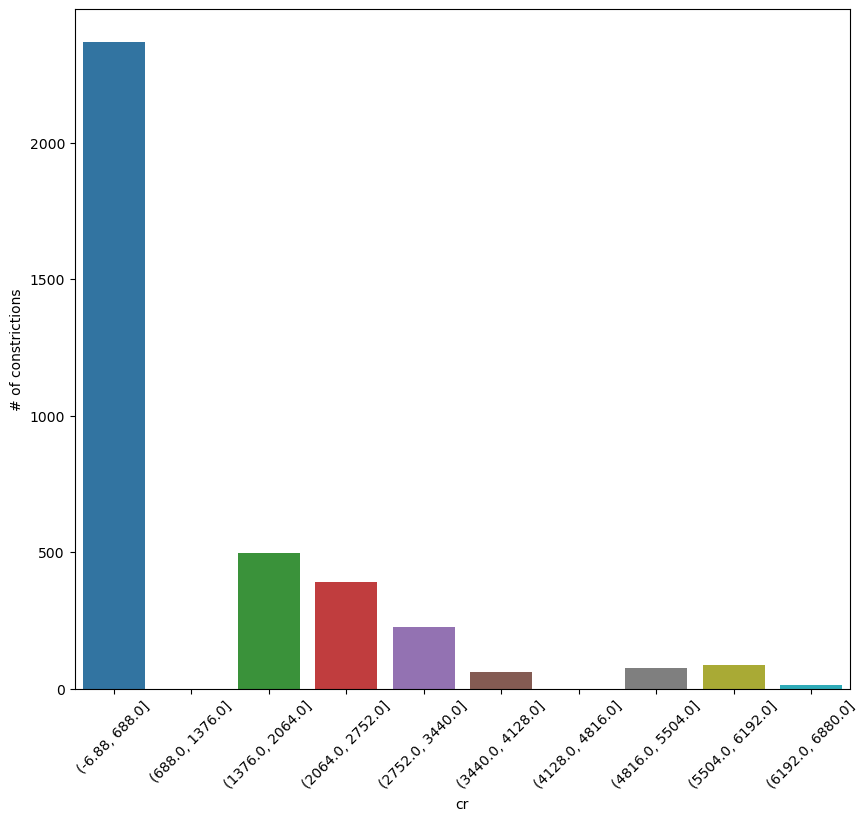

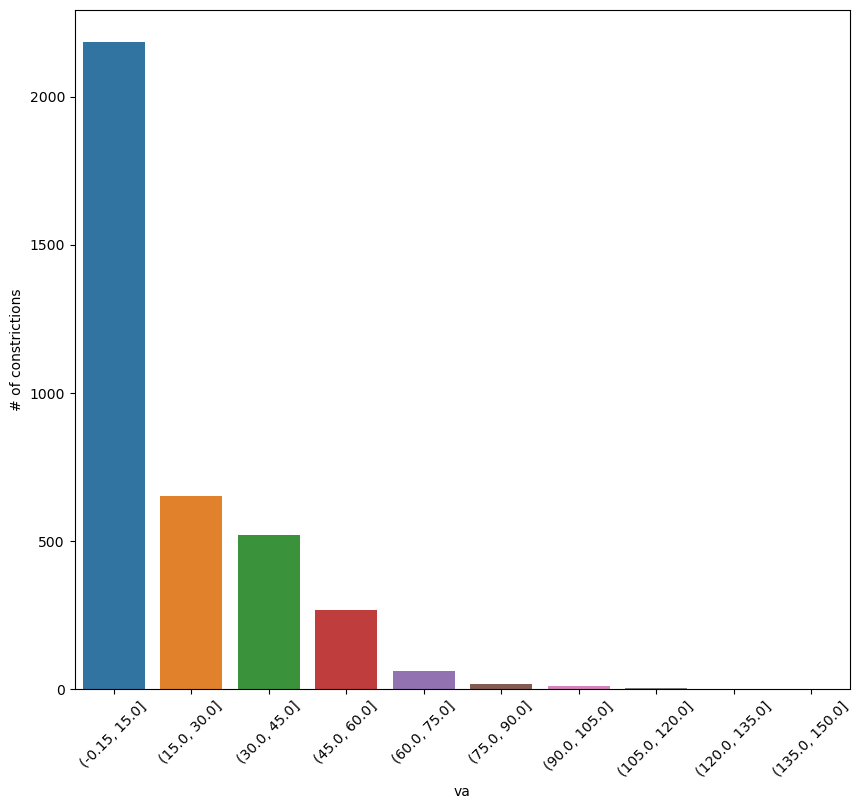

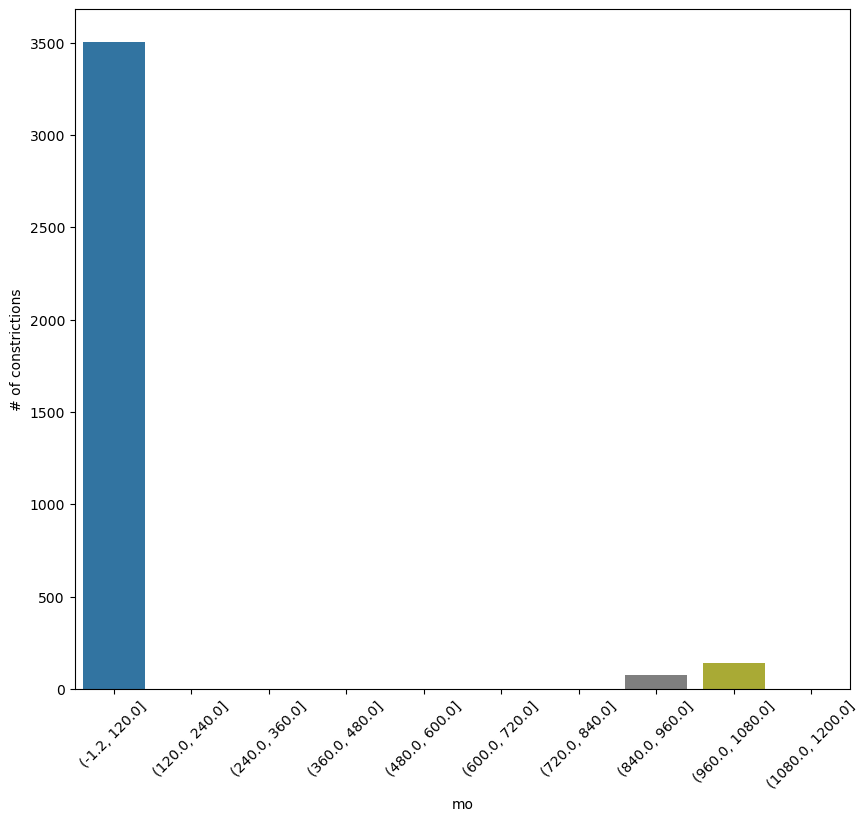

In [88]:
for col in columns[2:]:
    try:
        plotDf = CoilData[[col,'constriction']]
        plotDf = plotDf.sort_values(by=[col])

        plotDf[col] = pd.cut(plotDf[col],bins=10)
        plotDf = plotDf.groupby(col).constriction.sum()
        plotDf = pd.DataFrame(plotDf)
        plotDf = plotDf.reset_index()

        plotDf[col] = plotDf[col].astype(str)
        plt.figure(figsize=(10,9),dpi=100)
        plt.xticks(rotation=45)

        sns.barplot(data=plotDf,x=col,y="constriction")
        plt.ylabel("# of constrictions")
    except:
        continue



In [85]:
columns

NameError: name 'columns' is not defined

### Classification

In [161]:
#Create datasets

everything = ['Hardness_1', 'Hardness_2', 'Width', 'Temperature before finishing mill','Temperature after finishing mill', 'Thickness', 'c', 'mn', 'si', 'nb', 'p', 's', 'al', 'ma', 'b', 'n', 'ti', 'cr', 'va', 'mo']
hand_picked = ['c','mn','p','s','al','ma','b','ti','va','mo']
X = CoilData[everything]
y = CoilData['constriction']


In [205]:
#Random UNDERSAMPLING
#"""
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

"""

#Nearest Neighbour Undersamlping
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X, y)
"""
print(X_resampled.shape)
print(y_resampled.shape)

(7450, 20)
(7450,)


In [207]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

#### Models

##### RandomForest

In [208]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=30)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

Score : 0.8208053691275168

{'0': {'precision': 0.8479196556671449, 'recall': 0.785904255319149, 'f1-score': 0.815734989648033, 'support': 752}, '1': {'precision': 0.7969735182849937, 'recall': 0.8563685636856369, 'f1-score': 0.8256041802743305, 'support': 738}, 'accuracy': 0.8208053691275168, 'macro avg': {'precision': 0.8224465869760693, 'recall': 0.821136409502393, 'f1-score': 0.8206695849611818, 'support': 1490}, 'weighted avg': {'precision': 0.8226859312456499, 'recall': 0.8208053691275168, 'f1-score': 0.8206232196360917, 'support': 1490}}


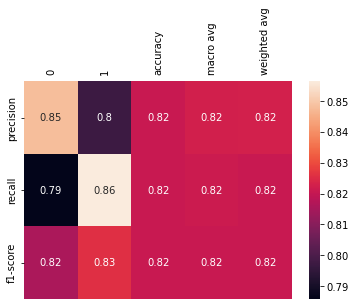

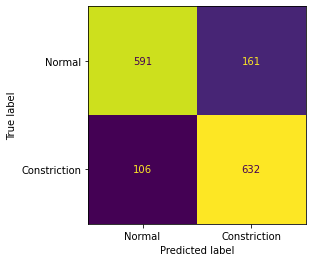

In [209]:
# Evaluate your model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

rep = classification_report(y_test,y_pred,output_dict=True)
print(f"Score : {clf.score(X_test, y_test)}\n")
print(rep)
plt.tick_params(labelbottom = False, bottom=False, labeltop=True)
sns.heatmap(pd.DataFrame(rep).iloc[:-1, :], annot=True)
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal','Constriction'])
cmd.plot(colorbar=False)